## Dimensionality Reduction

This project is based on the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.

### Process
Apply a Random Forest classification algorithm to MNIST dataset
Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
Apply dimensionality reduction techniques: t-SNE and LLE

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding

### Loading the MNIST dataset and splitting it into a training set and a test set

In [2]:
# YOUR CODE HERE
data = pd.read_csv('mnist_dataset.csv',index_col=0)
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.shape

(70000, 785)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 69999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 419.8 MB


In [5]:
if data.isnull().sum().sum()==0:
    print('There are no missing values in our dataset')
else:
    print(data.isnull().sum()/len(data)*100)

There are no missing values in our dataset


In [6]:
target = 'label'
cols_pred = [col for col in data.columns if col  not in [target]]

X = data[cols_pred]
y = data[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=10086, stratify=y) #stratified sampling based on the target
print(f"X_train.shape: {X_train.shape}")
print(f"X_test.shape: {X_test.shape}")
print(f"y_train.shape: {y_train.shape}")
print(f"y_test.shape: {y_test.shape}")


X_train.shape: (60000, 784)
X_test.shape: (10000, 784)
y_train.shape: (60000,)
y_test.shape: (10000,)


### Training a Random Forest classifier on the dataset and evaluating the resulting model on the test set.

In [9]:
num_folds = 5
seed = 123
kfold = KFold(n_splits=num_folds, random_state=seed)

C:\Users\Natalia Restrepo\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [10]:
max_features = 3
num = [4,5,10,20,50]

for num in num:
    time_start = time.time()
    model_RFC = RandomForestClassifier(n_estimators=num)#, max_features=max_features)
    model_RFC.fit(X_train, y_train)    
    print(' n_stimator=',num,'\n','Time elapsed: {} seconds'.format(time.time()-time_start))
    
    results_RFC = cross_val_score(model_RFC, X_train, y_train, cv=kfold)    
    print(' Accuracy: %.3f%% (%.3f%%)' % (results_RFC.mean()*100.0, results_RFC.std()*100.0))
    

 n_stimator= 4 
 Time elapsed: 3.9679293632507324 seconds
 Accuracy: 90.003% (0.327%)
 n_stimator= 5 
 Time elapsed: 4.915375471115112 seconds
 Accuracy: 91.487% (0.261%)
 n_stimator= 10 
 Time elapsed: 9.102542161941528 seconds
 Accuracy: 94.272% (0.228%)
 n_stimator= 20 
 Time elapsed: 17.177310705184937 seconds
 Accuracy: 95.650% (0.266%)
 n_stimator= 50 
 Time elapsed: 42.04124879837036 seconds
 Accuracy: 96.483% (0.204%)


- We can observe that the accuracy of the model does not increase significantly after n=10
- n=50 is significatively time consuming compared to the other stimators. 

We will use n=10 for the RFC model.

In [11]:
time_start = time.time()
model = RandomForestClassifier(n_estimators=10)
model.fit(X_train, y_train)
print('Time elapsed: {} seconds'.format(time.time()-time_start))


Time elapsed: 8.871773958206177 seconds


In [12]:
y_pred_test = model.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.9521

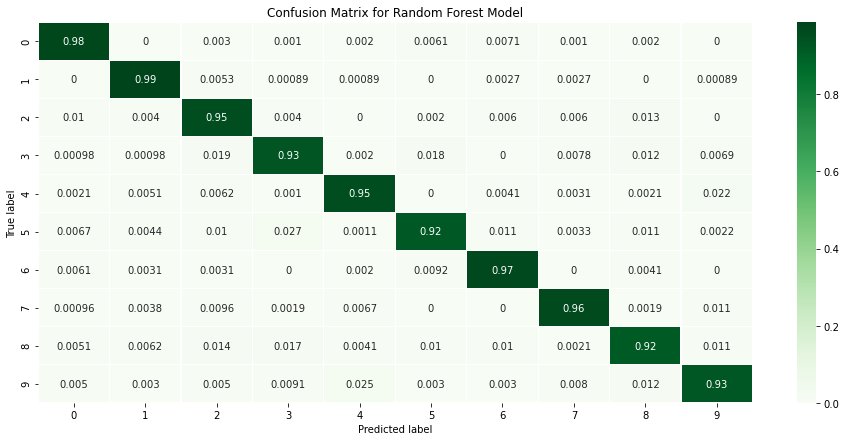

In [13]:
# Confusion Matrix for Random Forest
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.heatmap(matrix, annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [14]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       986
           1       0.97      0.99      0.98      1125
           2       0.93      0.95      0.94       999
           3       0.94      0.93      0.94      1020
           4       0.95      0.95      0.95       975
           5       0.95      0.92      0.93       902
           6       0.96      0.97      0.96       982
           7       0.97      0.96      0.97      1042
           8       0.94      0.92      0.93       975
           9       0.95      0.93      0.94       994

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



From the confusion matrix we can observe that our model was able to correctly predict the labels most of the times. The label that was mislabeled the most was label 8 but is not really significant. Overall our model was able to predict the true label >90% which is good.

This is also reflected in the classification report were the 3 metricts are significatively high. This means that our model was careful at labelling, but also we have a high re-call which means that we are not missing a lot of our data in each of the labels (wrong labelling)

### Using PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. 

In [16]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X, y, test_size=10000, random_state=10086, stratify=y) 
print(f"X_train_pca.shape: {X_train_pca.shape}")
print(f"X_test_pca.shape: {X_test_pca.shape}")
print(f"y_train_pca.shape: {y_train_pca.shape}")
print(f"y_test_pca.shape: {y_test_pca.shape}")

X_train_pca.shape: (60000, 784)
X_test_pca.shape: (10000, 784)
y_train_pca.shape: (60000,)
y_test_pca.shape: (10000,)


In [17]:
scaler = MinMaxScaler()
scaler.fit(X_train_pca)

X_train_pca = scaler.transform(X_train_pca)
X_test_pca = scaler.transform(X_test_pca)

In [18]:
time_start = time.time()
pca = PCA(n_components = 0.95)
pca.fit(X_train_pca)
print('Time elapsed: {} seconds'.format(time.time()-time_start))
print('To have a variation ratio of 95% we need',len(pca.explained_variance_ratio_),'new features')

Time elapsed: 13.097561120986938 seconds
To have a variation ratio of 95% we need 154 new features


In [19]:
pca.explained_variance_ratio_

array([0.09740339, 0.07171374, 0.06128861, 0.05392152, 0.04901916,
       0.04300892, 0.03270459, 0.02887167, 0.02758013, 0.02345861,
       0.02115762, 0.02029683, 0.01704223, 0.01686159, 0.01585073,
       0.0148155 , 0.01320984, 0.01281577, 0.01190219, 0.01153655,
       0.01066096, 0.01008699, 0.00964984, 0.0091147 , 0.00883131,
       0.00840471, 0.00807985, 0.00786225, 0.0074034 , 0.00691087,
       0.00654232, 0.00647195, 0.00600023, 0.0058857 , 0.00565515,
       0.00543799, 0.00504194, 0.00486947, 0.00480036, 0.00467997,
       0.0045524 , 0.00445497, 0.00417445, 0.00397509, 0.00383201,
       0.00376209, 0.00361658, 0.00348926, 0.00339645, 0.00320817,
       0.00318021, 0.00310692, 0.00296349, 0.00286924, 0.00282337,
       0.00269666, 0.00268572, 0.00256515, 0.0025332 , 0.0024453 ,
       0.00240128, 0.00237676, 0.00229582, 0.0022132 , 0.00212443,
       0.00207133, 0.00203121, 0.00195079, 0.00191644, 0.00188452,
       0.00186347, 0.00180377, 0.00176852, 0.00173547, 0.00165

- From the EA of our dataset we observed that we had a total of 784 predictive features. By using a PCA technique, we observe that the components explain very small parts of the data set, getting only a 9.7% of the dataset explained by the first component and significatively decreasing while increasing the number of variables.

- We can observe that at 8 variables we get new features containing only 2% or less of the data set. 

- To get to a variance ratio of 95% we need a significant amount of variables (154), but considering that we started with 784 features, the reduction is still significant.

In [20]:
X_train_pca = pca.transform(X_train_pca)
X_test_pca = pca.transform(X_test_pca)

In [21]:
time_start = time.time()
model1 = RandomForestClassifier(n_estimators=10)
model1.fit(X_train_pca,y_train)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 22.3246328830719 seconds


In [22]:
y_pred_test_pca = model1.predict(X_test_pca)
accuracy_score(y_test_pca, y_pred_test_pca)

0.8973

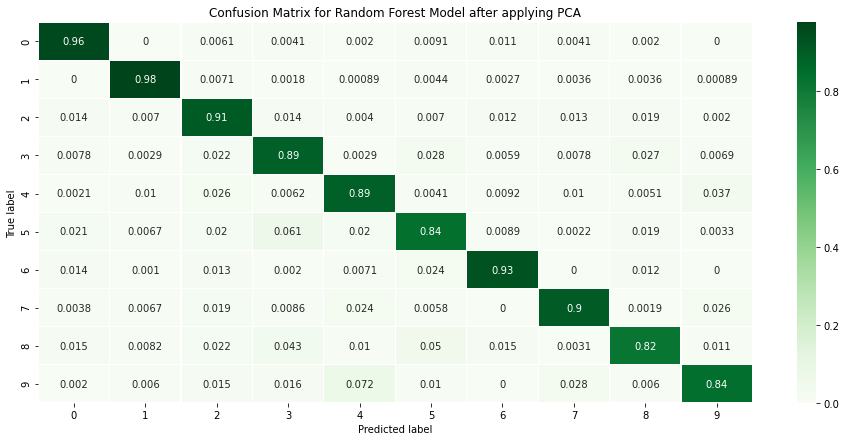

In [23]:
# Confusion Matrix for Random Forest
matrix = confusion_matrix(y_test_pca, y_pred_test_pca)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(16,7))
sns.heatmap(matrix, annot=True, annot_kws={'size':10},cmap=plt.cm.Greens, linewidths=0.2)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model after applying PCA')
plt.show()

In [24]:
print(classification_report(y_test_pca, y_pred_test_pca))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       986
           1       0.96      0.98      0.97      1125
           2       0.86      0.91      0.88       999
           3       0.86      0.89      0.87      1020
           4       0.86      0.89      0.87       975
           5       0.84      0.84      0.84       902
           6       0.93      0.93      0.93       982
           7       0.93      0.90      0.92      1042
           8       0.89      0.82      0.86       975
           9       0.91      0.84      0.87       994

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



From the confusion matrix we can observe that the accuracy of the model decreased significatively but was still able to correctly predict the labels most of the times. The label that was mislabeled the most was again label 8, we observe that now the classifier struggled more than before at predicting the label 8. 

This is also reflected in the classification report. We observe that even tought we had a precision closer to 90%, which means our model was careful to avoid wrongly labelling 8, the recall is lower which means we are missing some labels 8. We observe a simillar behavior with label 5.

Nevertheless, the model is still considered accurate after reducing significantively reducing the features from 784 to 154.

### Using t-SNE to reduce the MNIST dataset.

In [26]:
np.random.seed(123)
rndperm = np.random.permutation(data.shape[0])

In [27]:
N=10000
data_subset = data.loc[rndperm[:N],:].copy()
data_subset.shape

(10000, 785)

In [28]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_result = tsne.fit_transform(data_subset[cols_pred].values)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 5.770s...
[t-SNE] Computed neighbors for 10000 samples in 303.464s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 444.540493
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.878845
[t-SNE] KL divergence after 300 iterations: 2.844954
Time elapsed: 376.507

<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

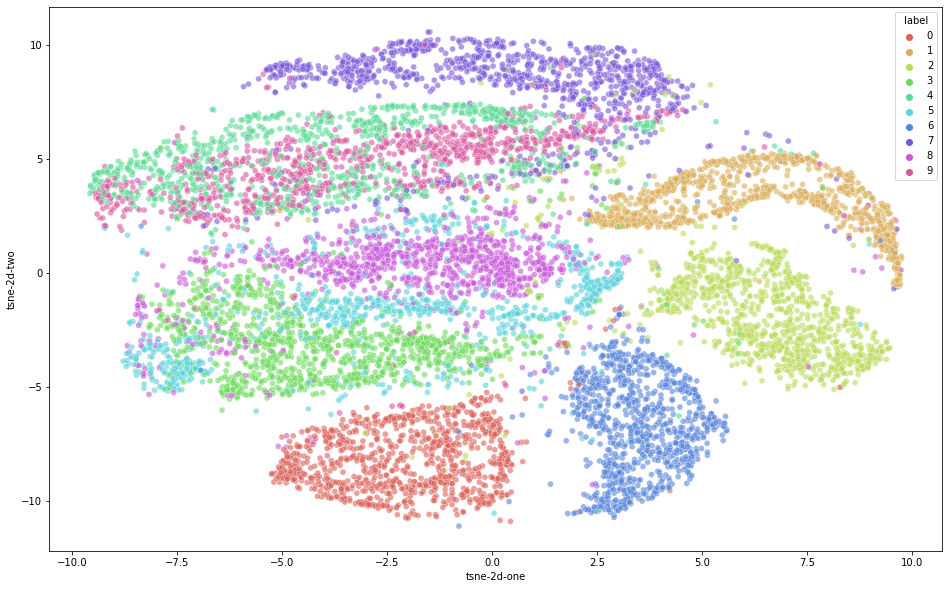

In [29]:
data_subset['tsne-2d-one'] = tsne_result[:, 0]
data_subset['tsne-2d-two'] = tsne_result[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='tsne-2d-one', y='tsne-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=data_subset,
               alpha=0.6)

We can see that the digits are very clearly clustered in their own sub groups.

### Comparing Locally Linear Embedding_ (LLE) method

In [31]:
time_start = time.time()
lle= LocallyLinearEmbedding(n_neighbors=5, n_components=2)
lle_result=lle.fit_transform(data_subset[cols_pred].values)
print('Time elapsed: {} seconds'.format(time.time()-time_start))

Time elapsed: 336.3026134967804 seconds


<AxesSubplot:xlabel='lle-2d-one', ylabel='lle-2d-two'>

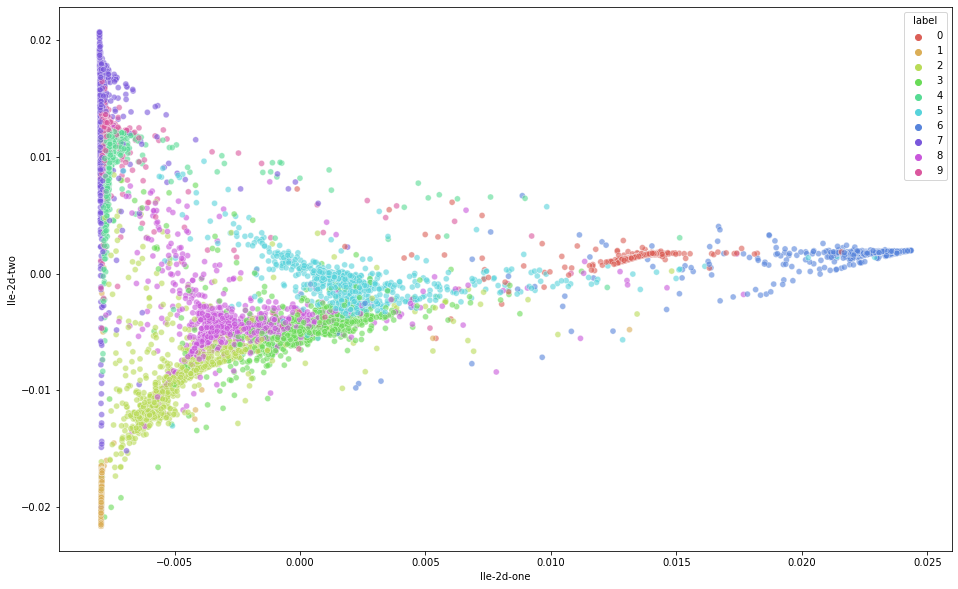

In [32]:
data_subset['lle-2d-one'] = lle_result[:, 0]
data_subset['lle-2d-two'] = lle_result[:, 1]

plt.figure(figsize=(16,10))
sns.scatterplot(x='lle-2d-one', y='lle-2d-two', hue='label',
               palette=sns.color_palette('hls', 10),
               data=data_subset,
               alpha=0.6)

- We can observe that LLE is also very useful at reducing significatively the features in a multivariable dataset, 
- LLE is signicatively more time consuming than t-SNE and the visualization of the data does not separate the data set in clear cluster as the t-SNE. Nevertheless, LLE method can be very useful when reducing dimentionally a complex dataset while keeping the weight matrix the same.